# ¿Cómo crece una población? 
> El modelo más simple de crecimiento poblacional de organismos es $\frac{dx}{dt}=rx$, donde $x(t)$ es la población en el tiempo $t$ y $r>0$ es la tasa de crecimiento.

> Este modelo predice crecimiento exponencial $x(t)=x_0e^{rt}$ (solución de la ecuación diferencial) donde $x_0=x(0)$ es la población inicial. ¿Es esto válido?
- Recordar que $\lim_{t\to\infty}x(t)=x_0\lim_{t\to\infty}e^{rt}=\infty$.
- Este modelo no tiene en cuenta entonces sobrepoblación ni recursos limitados.

> En realidad la tasa de crecimiento no es una constante, sino que depende de la población $\frac{dx}{dt}=\mu(x)x$. Cuando $x$ es pequeña $\mu(x)\approx r$, como antes, pero cuando $x>1$ (población normalizada) $\mu(x)<0$: la tasa de muerte es mayor a la tasa de nacimiento. Una forma matemática conveniente de modelar lo anterior es con una tasa de crecimiento $\mu(x)$ decreciendo linealmente con $x$.

Referencia:
- Strogatz, Steven. *NONLINEAR DYNAMICS AND CHAOS*, ISBN: 9780813349107, (eBook disponible en biblioteca).

<img style="float: center;" src="./poblacion.jpg" width="450px" height="250px" />

## Ecuación Logística
Primero, veamos como luce $\mu(x)$ con decrecimiento lineal respecto a la población x.

Como queremos que $\mu(0)=1$ y $\mu(1)=0$, la línea recta que conecta estos puntos es...

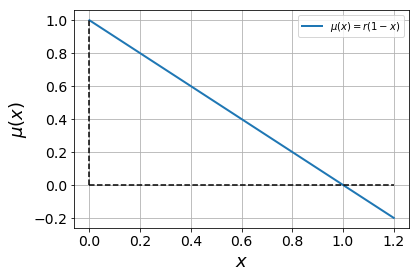

In [1]:
import numpy as np                      # Librería python numérico
import matplotlib.pyplot as plt         # Librería para graficar
%matplotlib inline

# Poner números en los ejes con tamaño personalizado
import matplotlib as mpl
label_size = 14
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# Definimos la tasa de crecimiento lineal
def mu(r,x):
    return r*(1-x)

r = 1                                   # Tasa máxima de crecimiento
N = 200                                 # Número de puntos para graficar
x = np.linspace(0,1.2,N)                # Vector de valores de población

# Gráfico de la función mu(x)
plt.figure()
plt.plot(x,mu(r,x),linewidth=2,label="$\mu(x)=r(1-x)$")
plt.plot(np.array([0, 1.2]),np.array([0, 0]),'--k')
plt.plot(np.array([0, 0]),np.array([0, 1]),'--k')
plt.legend(loc='best')
plt.grid()
plt.xlabel("$x$", fontsize=18)
plt.ylabel("$\mu(x)$", fontsize=18)
plt.show()

___
Entonces, con esta elección de $\mu(x)=r(1-x)$, obtenemos la llamada **ecuación lógistica**, publicada por Pierre Verhulst en 1838.

$$\frac{dx}{dt} = r\; x\; (1- x)$$

** Solución a la ecuación diferencial ** 

La ecuación diferencial inicial tiene *solución analítica*, 
$$ x(t) = \frac{1}{1+ (\frac{1}{x_{0}}- 1) e^{-rt}}.$$

Graficamos varias curvas de la solución analítica para $r = \left[-1, 1\right]$.

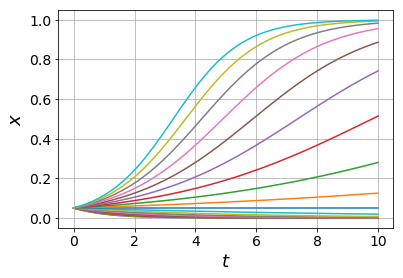

In [2]:
# Definimos la solución analítica
def logi_sol(t, x0, r):
    return 1/(1 + (1/x0 - 1) * np.exp(-r * t))

t = np.linspace(0,10)                                 # Vector de tiempo
x0 = 0.05                                          # Condicion inicial
# Gráficos para diferentes r
for r in np.arange(-1, 1,.1):
    plt.plot(t, logi_sol(t, x0, r))

plt.grid()
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

Como podemos ver, la solución a está ecuación en el continuo nos puede ganantizar la extinción o bien un crecimiento descomunal, dependiendo del valor asignado a $r$. 

*Numéricamente*, ¿cómo resolveríamos esta ecuación? 

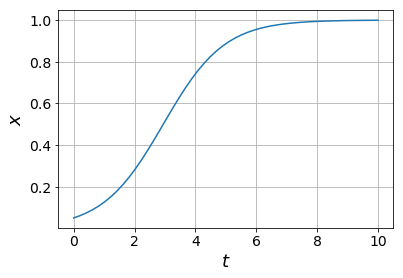

In [3]:
from scipy.integrate import odeint             # Función de solución numérica de EDO

# Definicimos la ecuación logística para integrar con odeint
def poblacion(x, t, r):
    return mu(r,x)*x

r = 1                                          # Tasa de crecimiento máxima
x0 = 0.05                                      # Población inicial
tt = t                                         # Vector de tiempo de 0 a 10
xx = odeint(poblacion, x0, tt, (r,))           # Solución numérica

# Gráfico de la solución
plt.figure()
plt.plot(tt, xx)
plt.grid()
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

### ¿Qué tan buena es la aproximación de la solución numérica?
Hay ecuaciones diferenciales ordinarias no lineales para las cuales es imposible obtener la solución exacta. En estos casos, se evalúa una solución aproximada de forma numérica.

Para el caso anterior fue posible obtener la solución exacta, lo cual nos permite comparar ambas soluciones y evaluar qué tan buena es la aproximación que nos brinda la solución numérica.

Primero veamos esto gráficamente

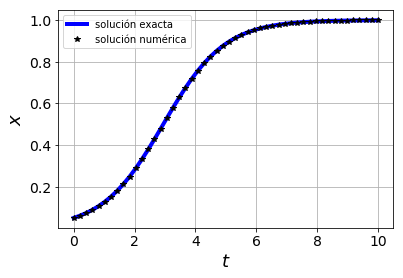

In [4]:
x_numerica = xx[:,0]                        # Extraemos el vector de la solución numérica
x_exacta = logi_sol(t,x0,r)                 # Solución exacta con r=1

# Gráfico de la comparación
plt.figure()
plt.plot(t, x_exacta, '-b', lw = 4, label = 'solución exacta')
plt.plot(t, x_numerica, '*k', lw = 4, label = 'solución numérica')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$x$', fontsize = 18)
plt.show()

Gráficamente vemos que la solución numérica está cerca (coincide) con la solución exacta. Sin embargo, con esta gráfica no podemos visualizar qué tan cerca están una solución de la otra. ¿Qué tal si evaluamos el error?

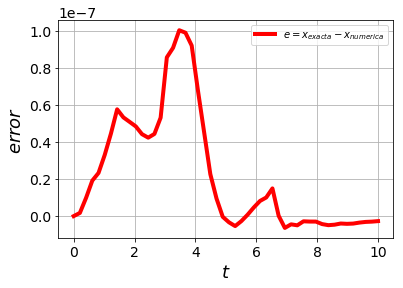

In [5]:
error = x_exacta-x_numerica                 # Vector de error de aproximación

# Gráfico del error
plt.figure()
plt.plot(t, error, '-r', lw = 4, label = '$e=x_{exacta}-x_{numerica}$')
plt.grid()
plt.legend(loc='best')
plt.xlabel('$t$', fontsize = 18)
plt.ylabel('$error$', fontsize = 18)
plt.show()

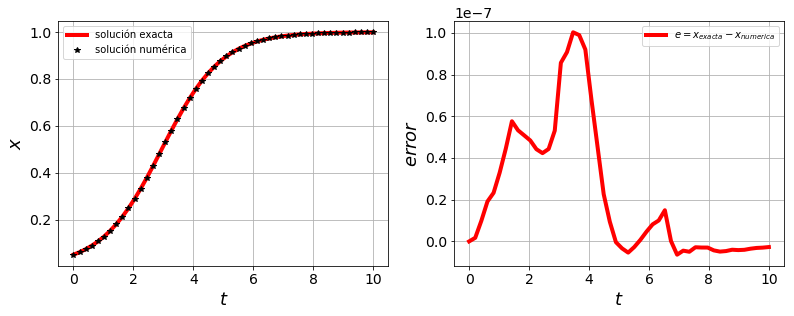

In [6]:
# Gráfico de la comparación y del error
fig, (ax1, ax2) = plt.subplots(1, 2,figsize =(13,4.5))

ax1.plot(t, x_exacta, '-r', lw = 4, label = 'solución exacta')
ax1.plot(t, x_numerica, '*k', lw = 4, label = 'solución numérica')
ax1.grid()
ax1.legend(loc='best')
ax1.set_xlabel('$t$', fontsize = 18)
ax1.set_ylabel('$x$', fontsize = 18)

ax2.plot(t, error, '-r', lw = 4, label = '$e=x_{exacta}-x_{numerica}$')
ax2.grid()
ax2.legend(loc='best')
ax2.set_xlabel('$t$', fontsize = 18)
ax2.set_ylabel('$error$', fontsize = 18)

plt.show()

Entonces, **cualitativamente** ya vimos que la solución numérica es *suficientemente buena*. De todas maneras, es siempre bueno cuantificar *qué tan buena* es la aproximación. Varias formas:
- <font color=blue>Norma del error</font>: tenemos el error de aproximación en ciertos puntos (especificados por el vector de tiempo). Este error es entonces un vector y le podemos tomar su norma 2

$$||e||_2=\sqrt{e[0]^2+\dots+e[n-1]^2}$$

In [7]:
np.linalg.norm(error)

2.7486108664240486e-07

- <font color=blue>Error cuadrático medio</font>: otra forma de cuantificar es con el error cuadrático medio

$$e_{ms}=\frac{e[0]^2+\dots+e[n-1]^2}{n}$$

In [8]:
np.mean(np.sum(error**2))

7.5548616950243596e-14

- <font color=blue>Integral del error cuadrático</font>: evalúa la acumulación de error cuadrático. Se puede evaluar cabo con la siguiente aproximación rectangular de la integral

$$e_{is}=\int_{0}^{t_f}e(t)^2\text{d}t\approx \left(e[0]^2+\dots+e[n-1]^2\right)h$$

donde $h$ es el tamaño de paso del vector de tiempo.

In [9]:
h = t[1]-t[0]
np.sum(error**2)*h

1.5418085091886449e-14

### Comentarios del modelo logístico
El modelo no se debe tomar literalmente. Más bien se debe interpretar metefóricamente como que la población tiene una tendencia a crecer hasta su tope, o bien, desaparecer.

La ecuación logística fue probada en experimentos de laboratorio para colonias de bacterias en condiciones de clima constante, abastecimiento de comida y ausencia de predadores. Los experimentos mostraron que la ecuación predecía muy bien el comportamiento real.

Por otra parte, la predicción no resultó tan buena para moscas que se alimentan de frutas, escarabajos y otros organismos con ciclos de vida complejos. En esos casos se observaron fluctuaciones (oscilaciones) inmensas de la población.

___
## Mapa logístico
> La ecuación logística (curva de crecimiento logístico) es un modelo del crecimiento continuo en el tiempo. Una modificación de la ecuación continua a una ecuación de recurrencia discreta conocida como **mapa logistico** es muy usada.

Referencia: 
- https://es.wikipedia.org/wiki/Aplicación_log%C3%ADstica
- https://en.wikipedia.org/wiki/Logistic_map

> Si reemplazamos la ecuación logísitica por la ecuación a diferencias: 

> $$x_{n+1} = r\; x_{n}(1- x_{n}),$$

> donde $r$ es la razón de crecimiento máximo de la población y $x_{n}$ es la n-ésima iteración. Entonces, lo que tenemos que programar es la siguiente relación recursiva

> $$x_{n+1}^{(r)} = f_r(x_n^{(r)}) = rx_n^{(r)}(1-x_n^{(r)})$$

El siguiente `gif` muestra las primeras 63 iteraciones de la anterior ecuación para diferentes valores de $r$ variando entre 2 y 4.

<img style="float: center;" src="https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif" width="800px" height="400px" />

Tomado de https://upload.wikimedia.org/wikipedia/commons/1/1f/Logistic_map_animation.gif.

Note que:
- Para $2<r<3$ el las soluciones se estabilizan en un valor de equilibrio.
- Para $3<r<1+\sqrt{6}\approx 3.44949$ el las soluciones oscilan entre dos valores.
- Para $3.44949<r<3.54409$ las soluciones oscilan entre cuatro valores.
- Para $r>3.54409$ las soluciones exhiben un comportamiento **caótico**.

<font color=red> Caos: comportamiento determinista aperiódico muy sensible a las condiciones iniciales. Es decir, pequeñas variaciones en dichas condiciones iniciales pueden implicar grandes diferencias en el comportamiento futuro</font>

**¿Cómo podemos capturar este comportamiento en una sola gráfica?**

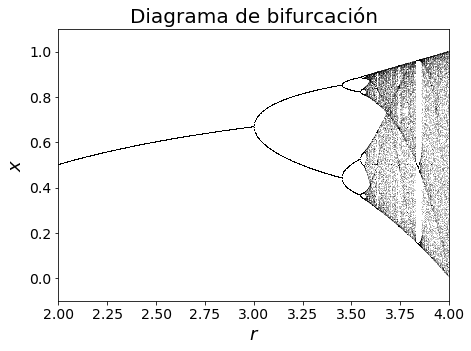

In [10]:
# Definición de la función mapa logístico
def mapa_logistico(r, x):
    return r * x * (1 - x)

# Para mil valores de r entre 2.0 y 4.0
n = 1000
r = np.linspace(2.0, 4.0, n)

# Hacemos 1000 iteraciones y nos quedamos con las ultimas 100 (capturamos el comportamiento final)
iteraciones = 1000
ultimos = 100

# La misma condición inicial para todos los casos. 
x = 1e-5 * np.ones(n)

# Gráfico
plt.figure(figsize=(7, 5))
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        plt.plot(r, x, ',k', alpha=.2)
plt.xlim(np.min(r), np.max(r))
plt.ylim(-.1, 1.1)
plt.title("Diagrama de bifurcación", fontsize=20)
plt.xlabel('$r$', fontsize=18)
plt.ylabel('$x$', fontsize=18)
plt.show()

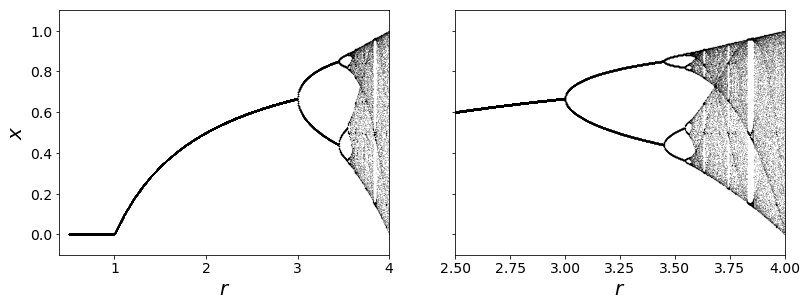

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',figsize =(13,4.5))
r = np.linspace(.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax1.plot(r, x, '.k', alpha=1,  ms = .1)
r = np.linspace(2.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax2.plot(r, x, '.k', alpha=1, ms = .1)
ax1.set_xlim(.4, 4)
ax1.set_ylim(-.1, 1.1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-.1, 1.1)
ax1.set_ylabel('$x$', fontsize = 20)
ax1.set_xlabel('$r$', fontsize = 20)
ax2.set_xlabel('$r$', fontsize = 20)
plt.show()

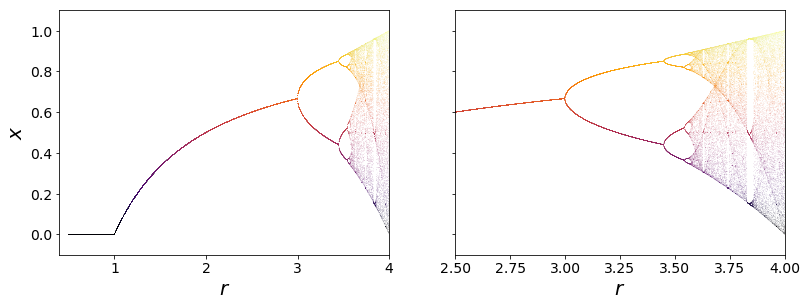

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex='col', sharey='row',figsize =(13,4.5))
r = np.linspace(.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax1.scatter(r, x,  s = .1, cmap= 'inferno', c = x, lw = 0)
r = np.linspace(2.5, 4.0, n)
for i in np.arange(iteraciones):
    x = mapa_logistico(r, x)
    if i >= (iteraciones - ultimos):
        ax2.scatter(r, x, s = .1, cmap = 'inferno', c = x, lw = 0)
ax1.set_xlim(.4, 4)
ax1.set_ylim(-.1, 1.1)
ax2.set_xlim(2.5, 4)
ax2.set_ylim(-.1, 1.1)
ax1.set_ylabel('$x$', fontsize = 20)
ax1.set_xlabel('$r$', fontsize = 20)
ax2.set_xlabel('$r$', fontsize = 20)
plt.show()

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Lázaro Alonso. Modified by Esteban Jiménez Rodríguez.
</footer>